In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import secrets
import tensorflow as tf

In [4]:
df=pd.read_csv('mushrooms.csv')
df=df.dropna(how='any')

In [5]:
b=list (df['stalk-root'].unique())
b

['e', 'c', 'b', 'r', '?']

In [9]:
df['stalk-root']=df['stalk-root'].replace('?',(secrets.choice(b)))
df['Type']=df['class']
df=df.drop(columns=['class'])

In [10]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le2=LabelEncoder()
df['cap-shape']=le1.fit_transform(df['cap-shape'])
df['cap-surface']=le1.fit_transform(df['cap-surface'])
df['cap-color']=le1.fit_transform(df['cap-color'])
df['bruises']=le1.fit_transform(df['bruises'])
df['odor']=le1.fit_transform(df['odor'])
df['gill-attachment']=le1.fit_transform(df['gill-attachment'])
df['gill-spacing']=le1.fit_transform(df['gill-spacing'])
df['gill-size']=le1.fit_transform(df['gill-size'])
df['gill-color']=le1.fit_transform(df['gill-color'])
df['stalk-shape']=le1.fit_transform(df['stalk-shape'])
df['stalk-root']=le1.fit_transform(df['stalk-root'])
df['stalk-surface-above-ring']=le1.fit_transform(df['stalk-surface-above-ring'])
df['stalk-surface-below-ring']=le1.fit_transform(df['stalk-surface-below-ring'])
df['stalk-color-above-ring']=le1.fit_transform(df['stalk-color-above-ring'])
df['stalk-color-below-ring']=le1.fit_transform(df['stalk-color-below-ring'])
df['veil-type']=le1.fit_transform(df['veil-type'])
df['veil-color']=le1.fit_transform(df['veil-color'])
df['ring-number']=le1.fit_transform(df['ring-number'])
df['ring-type']=le1.fit_transform(df['ring-type'])
df['spore-print-color']=le1.fit_transform(df['spore-print-color'])
df['population']=le1.fit_transform(df['population'])
df['habitat']=le1.fit_transform(df['habitat'])
df['Type']=le2.fit_transform(df['Type'])
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Type
0,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,1,2,2,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,2,2,2,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,2,2,2,7,7,0,2,1,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,2,2,2,5,5,0,1,1,4,0,1,2,0
8120,5,2,4,0,5,0,0,0,11,0,2,2,2,5,5,0,0,1,4,0,4,2,0
8121,2,2,4,0,5,0,0,0,5,0,2,2,2,5,5,0,1,1,4,0,1,2,0
8122,3,3,4,0,8,1,0,1,0,1,2,2,1,7,7,0,2,1,0,7,4,2,1


In [11]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values


In [14]:
y=Y.reshape(len(Y),1)
y

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=30, activation='relu'))
ann.add(tf.keras.layers.Dense(units=60, activation='relu'))
ann.add(tf.keras.layers.Dense(units=90, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [32]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history=ann.fit(X_train, y_train, batch_size=15, epochs=150)
ann.save("MC.h5")

Epoch 1/150
407/407 [==============================] - 1s 2ms/step - loss: 0.3311 - accuracy: 0.8540
Epoch 2/150
407/407 [==============================] - 1s 2ms/step - loss: 0.0436 - accuracy: 0.9876
Epoch 3/150
407/407 [==============================] - 1s 2ms/step - loss: 0.0128 - accuracy: 0.9973
Epoch 4/150
407/407 [==============================] - 1s 1ms/step - loss: 0.0054 - accuracy: 0.9987
Epoch 5/150
407/407 [==============================] - 1s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 6/150
407/407 [==============================] - 1s 2ms/step - loss: 7.2301e-04 - accuracy: 1.0000
Epoch 7/150
407/407 [==============================] - 1s 2ms/step - loss: 3.8826e-04 - accuracy: 1.0000
Epoch 8/150
407/407 [==============================] - 1s 2ms/step - loss: 1.8883e-04 - accuracy: 1.0000
Epoch 9/150
407/407 [==============================] - 1s 2ms/step - loss: 1.5742e-04 - accuracy: 1.0000
Epoch 10/150
407/407 [==============================] - 1s 2ms/step - loss:

Saved Model & Graph to disk


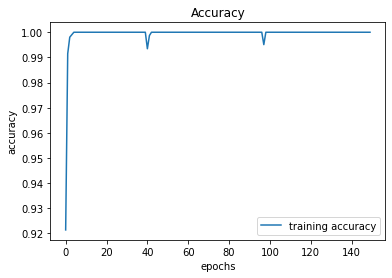

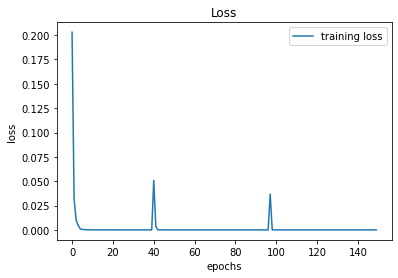

In [33]:

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('Accuracy.png')

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('Loss.png')
print("Saved Model & Graph to disk")

In [36]:
y_pred = ann.predict(X_test)
y_pred=np.round(y_pred)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1. 1.]
 [0. 0.]
 [0. 0.]
 ...
 [1. 1.]
 [0. 0.]
 [0. 0.]]


In [39]:
from sklearn.metrics import accuracy_score
print("Accuracy Score for the algorithm=>{}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy Score for the algorithm=>100.0%
